## Import the Packages

In [149]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

## Gather Data

In [150]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

In [151]:
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [152]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

In [153]:
target = raw_df.values[1::2, 2] 

In [154]:
data = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B','LSTAT'])

In [155]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [157]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

## Data points and features

In [158]:
data.shape

(506, 13)

In [159]:
type(data)

pandas.core.frame.DataFrame

In [160]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [161]:
# prices of the house in thousands
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [162]:
type(target)

numpy.ndarray

## Data Exploration

In [163]:
# adding the target ndarray as price column

data['PRICE'] = target

In [164]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [165]:
data.count() # shows number of rows

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Dataset - Check for missing values

In [166]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

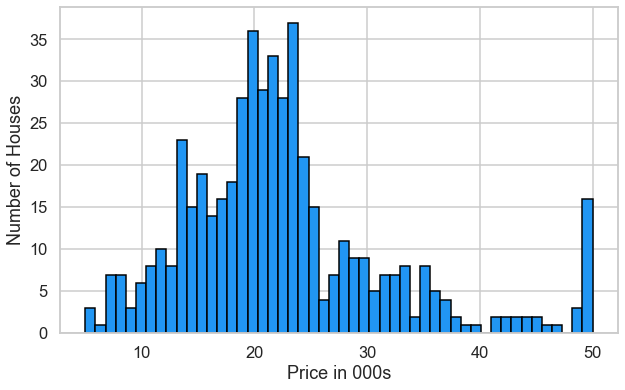

In [168]:
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins = 50, ec = 'black', color = '#2196f3')

plt.xlabel('Price in 000s')
plt.ylabel('Number of Houses')

plt.show()

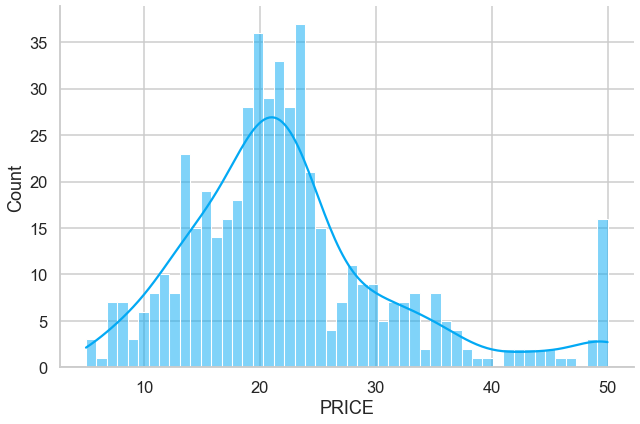

In [169]:

sns.displot(data['PRICE'], kde = True, height = 6, aspect= 1.5, bins = 50, color='#03A9F4' ) 

plt.show()

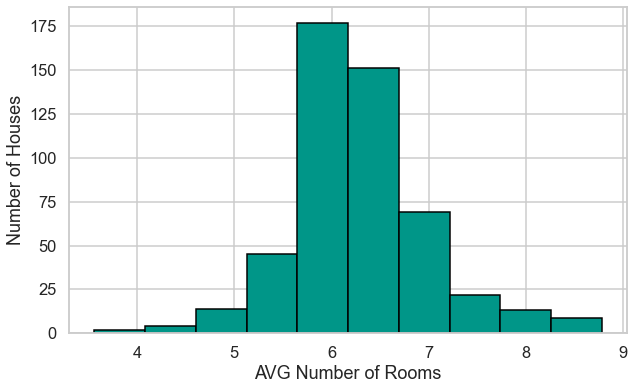

In [170]:
plt.figure(figsize=(10, 6))
plt.hist(data['RM'], ec = 'black', color = '#009688')

plt.xlabel('AVG Number of Rooms')
plt.ylabel('Number of Houses')

plt.show()

In [171]:
data.RAD.unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [172]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

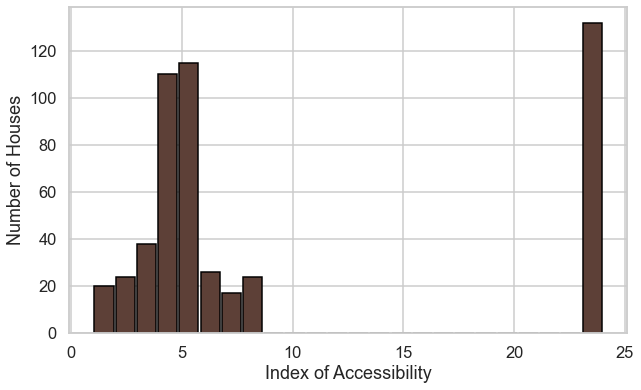

In [173]:
plt.figure(figsize=(10, 6))
plt.hist(data['RAD'], bins = 24, ec = 'black', color = '#5D4037', rwidth = 0.9)

plt.xlabel('Index of Accessibility')
plt.ylabel('Number of Houses')

plt.show()

In [174]:
frequency = data['RAD'].value_counts()  # making a pandas series

In [175]:
type(frequency)

pandas.core.series.Series

In [176]:
# frequency.index
frequency.axes[0]

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')

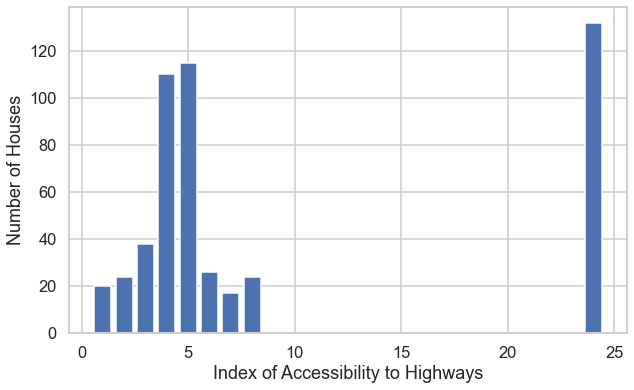

In [177]:
plt.figure(figsize=(10, 6))

plt.bar(frequency.index, height= frequency)
plt.xlabel('Index of Accessibility to Highways')
plt.ylabel('Number of Houses')


plt.show()

## Correlation

## $$ \rho _{XY} = corr(X, Y)$$
## $$ -1.0 \leq \rho _{X,Y} \leq + 1.0 $$

In [178]:
# correlation between price and number of rooms
data['PRICE'].corr(data['RM'])    # it has a positive correlation

0.695359947071539

In [179]:
# correlation between price and pupil teacher ratio
data['PRICE'].corr(data['PTRATIO'])   # it has negative correlation

-0.5077866855375615

In [180]:
#calling correlation method on entire table 
# pearson correlation coefficients by default
data.corr() 

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [181]:
mask = np.zeros_like(data.corr())
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [182]:
triangle_indices = np.triu_indices_from(mask)

In [183]:
triangle_indices

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  8,
         8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11,
        12, 12, 13]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13,  5,  6,  7,  8,  9, 10, 11, 12,
        13,  6,  7,  8,  9, 10, 11, 12, 13,  7,  8,  9, 10, 11, 12, 13,  8,
         9, 10, 11, 12, 13,  9, 10, 11, 12, 13, 10, 11, 12, 13, 11, 12, 13,
        12, 13, 13]))

In [184]:
mask[triangle_indices] = True

In [185]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

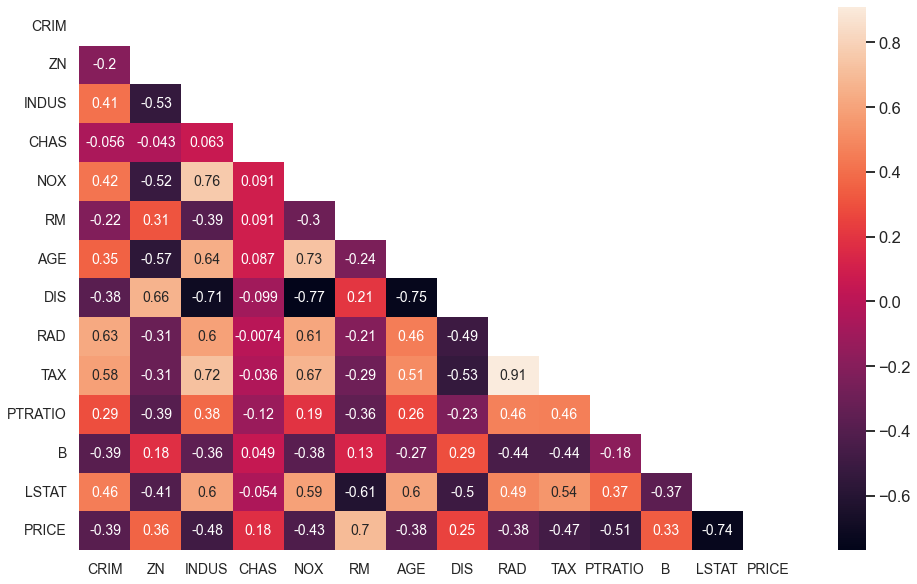

In [186]:
plt.figure(figsize=(16, 10))

sns.heatmap(data.corr(), mask = mask, annot = True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

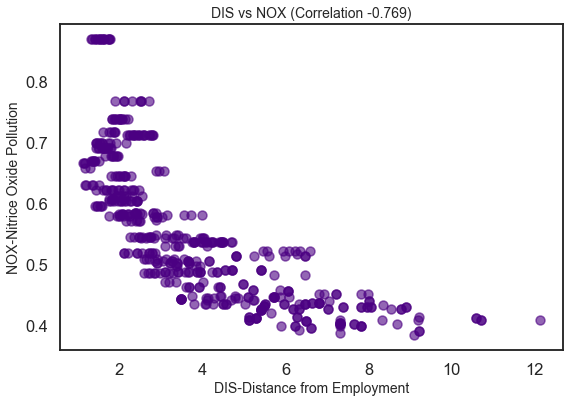

In [187]:
# relationship between pollution and distance
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(9,6))

plt.scatter(x=data['DIS'], y=data['NOX'], alpha = 0.6, s = 80, color = 'indigo')

plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS-Distance from Employment', fontsize =14)
plt.ylabel('NOX-Nitrice Oxide Pollution', fontsize =14)

plt.show()

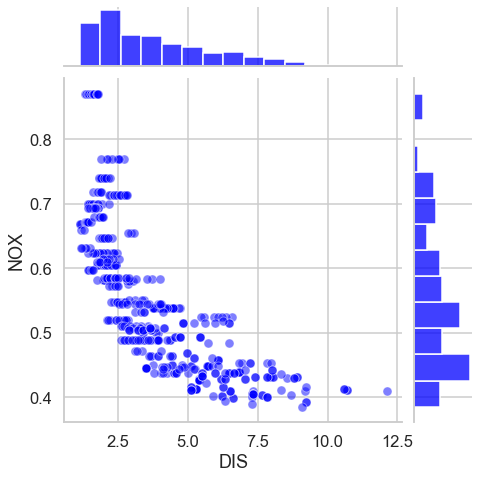

In [188]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')


sns.jointplot(x = data['DIS'], y = data['NOX'], height = 7, color = 'blue', joint_kws={'alpha': 0.5})
plt.show()

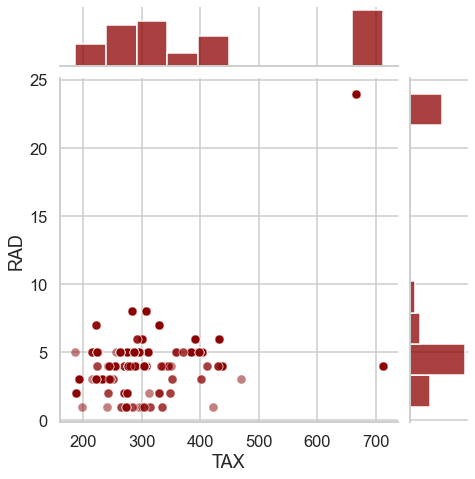

In [189]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')


sns.jointplot(x = data['TAX'], y = data['RAD'], height = 7, color = 'darkred', joint_kws={'alpha': 0.5})
plt.show()

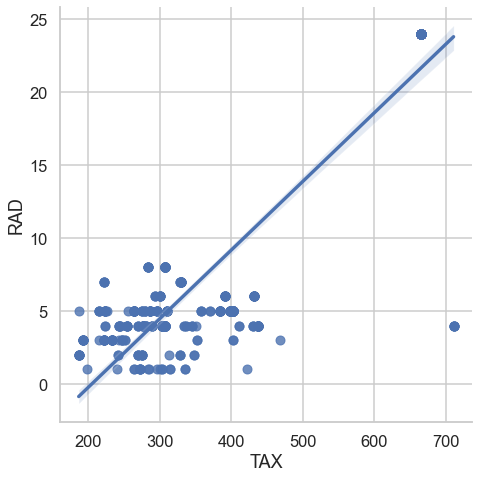

In [190]:
sns.lmplot(x = 'TAX', y = 'RAD', data = data, height=7 )

plt.show()

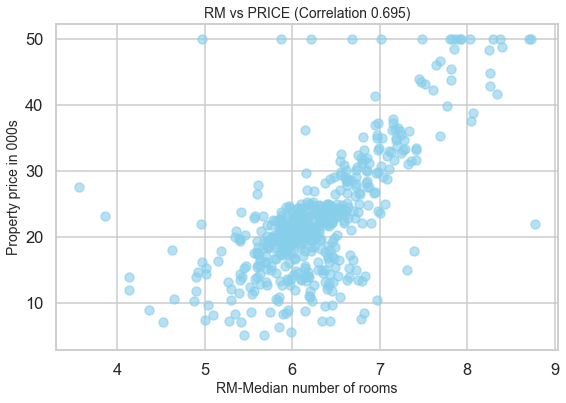

In [191]:
# scatter plot between house prices and rooms

rm_tgt_corr = round(data['RM'].corr(data['PRICE']), 3)

plt.figure(figsize=(9,6))

plt.scatter(x=data['RM'], y=data['PRICE'], alpha = 0.6, s = 80, color = 'skyblue')

plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM-Median number of rooms', fontsize =14)
plt.ylabel('Property price in 000s', fontsize =14)

plt.show()



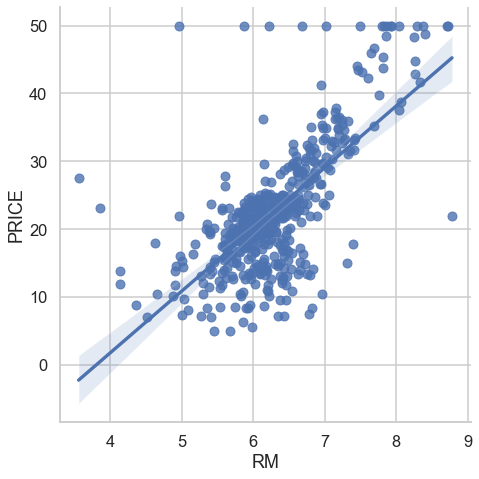

In [192]:
sns.lmplot(x = 'RM', y = 'PRICE', data = data, height=7 )

plt.show()

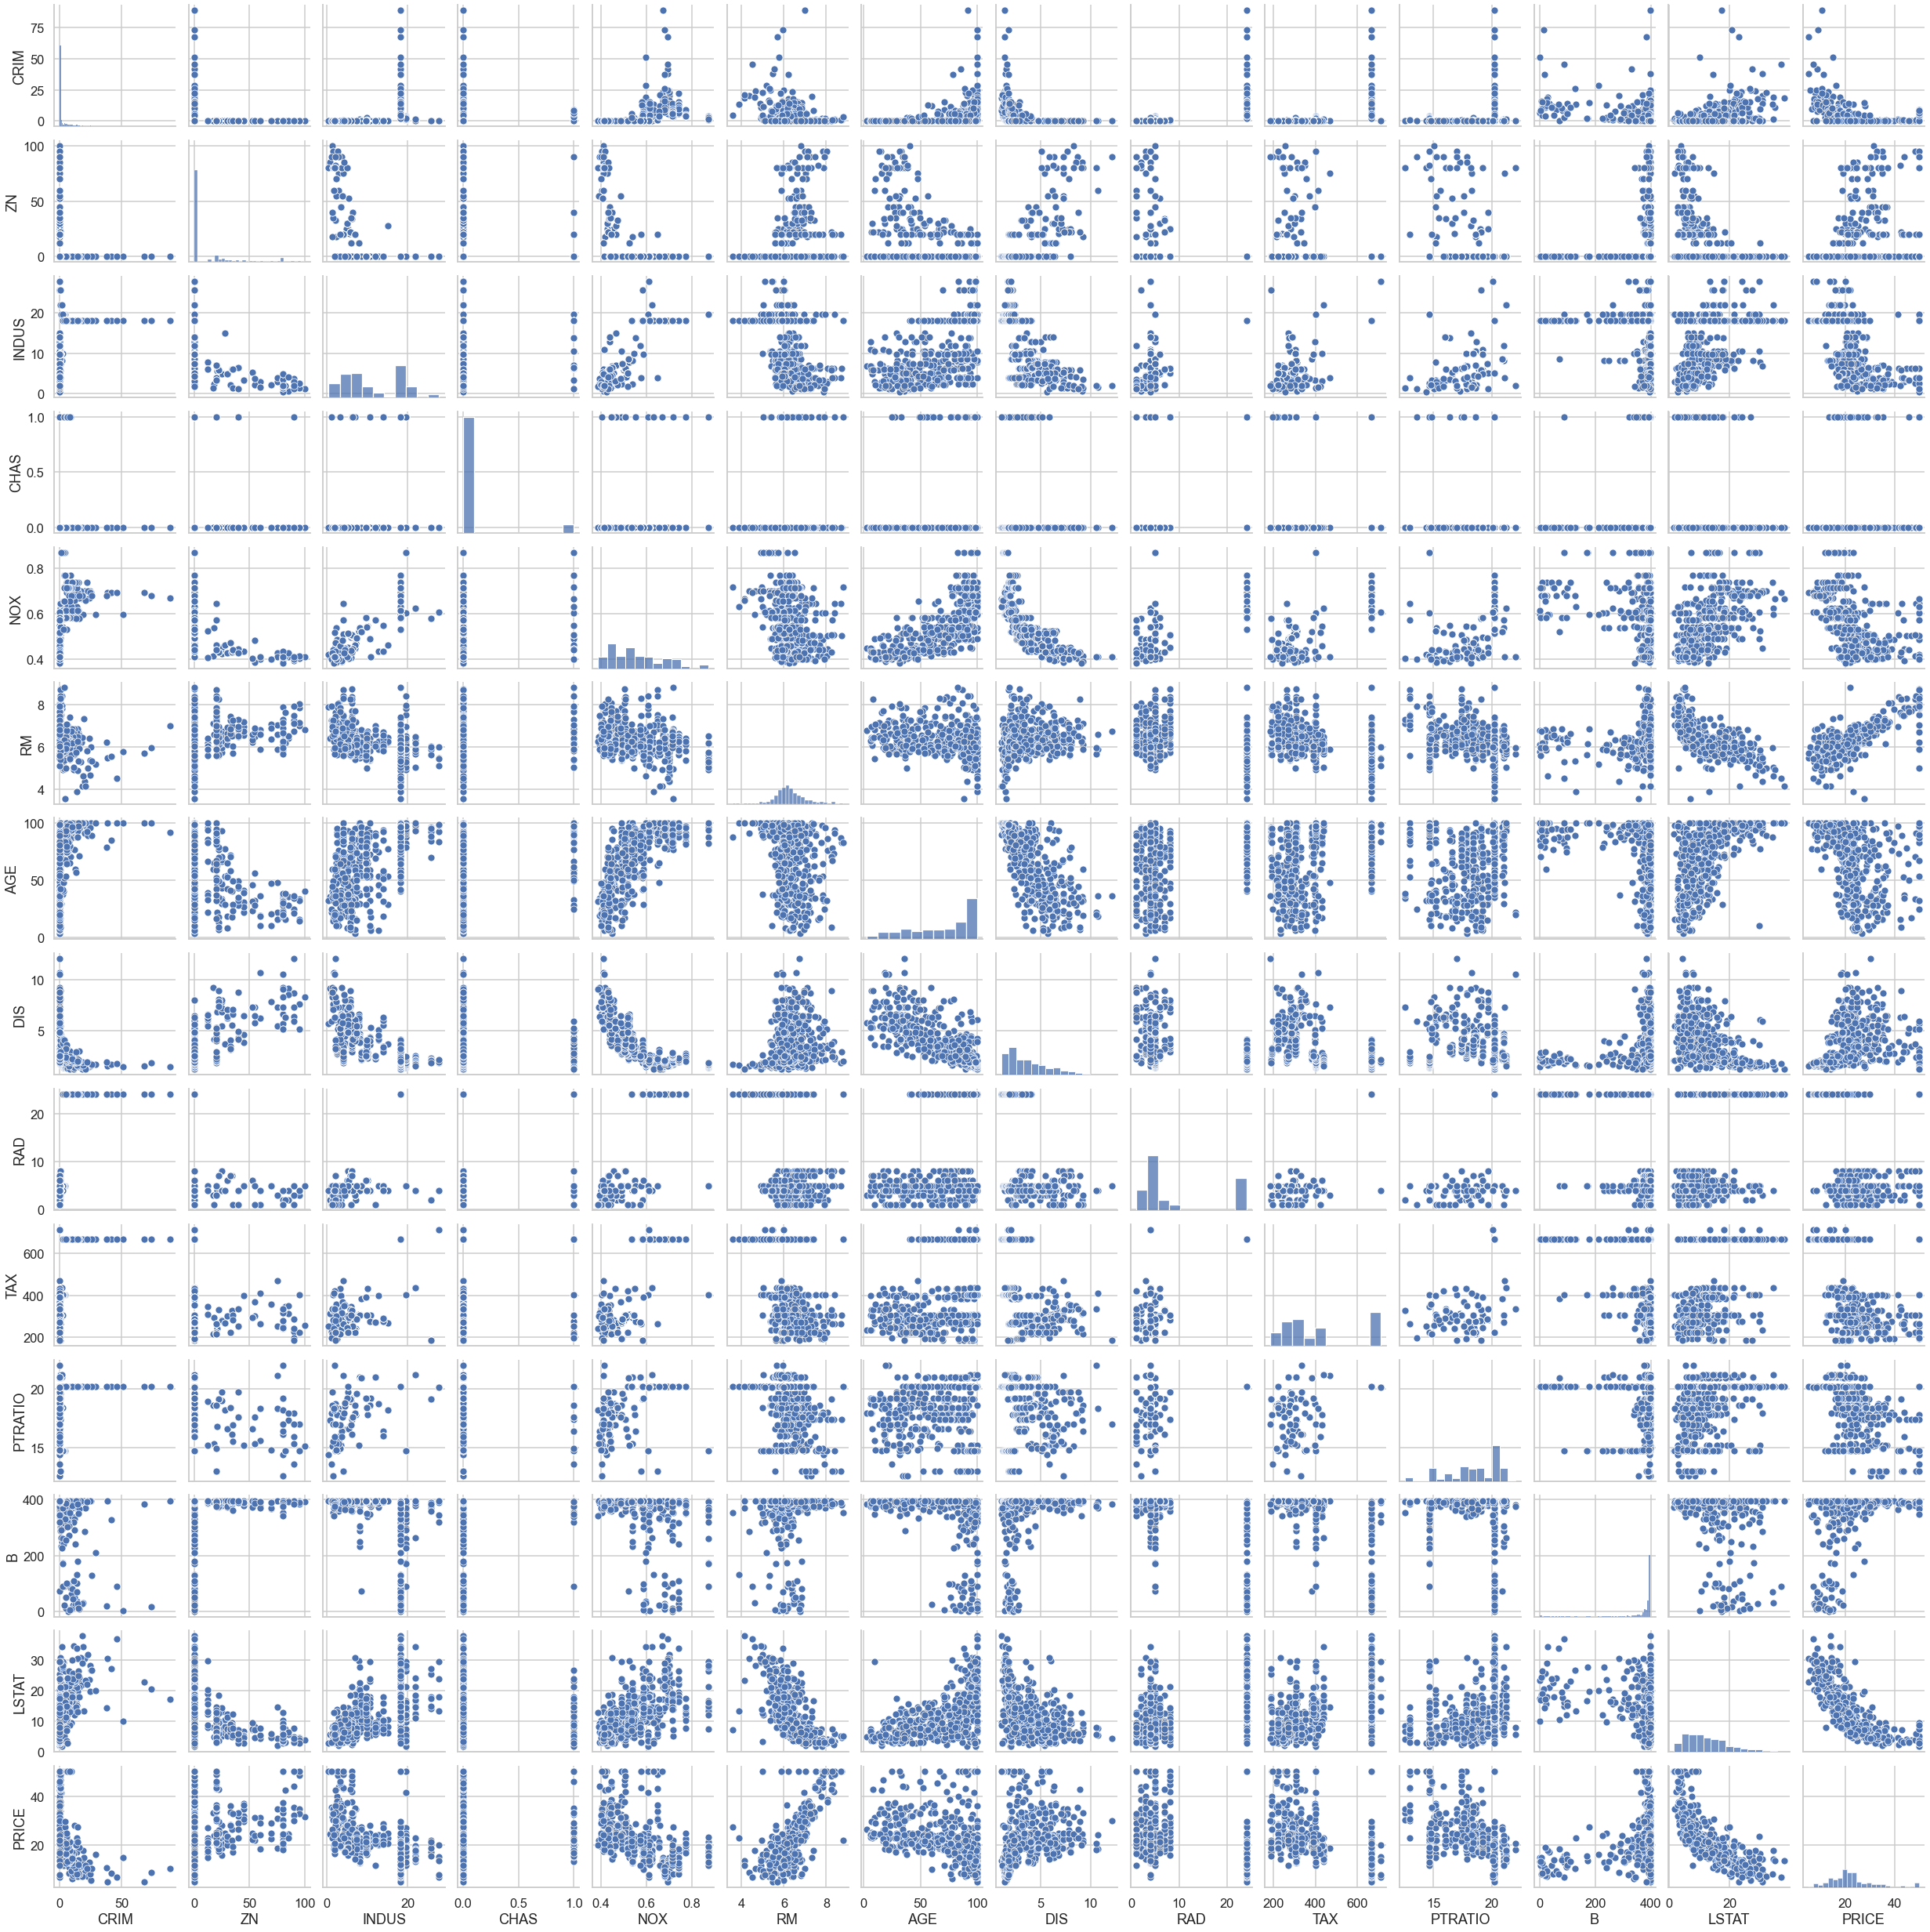

CPU times: total: 27.1 s
Wall time: 27.1 s


In [193]:
%%time

sns.pairplot(data)
plt.show()

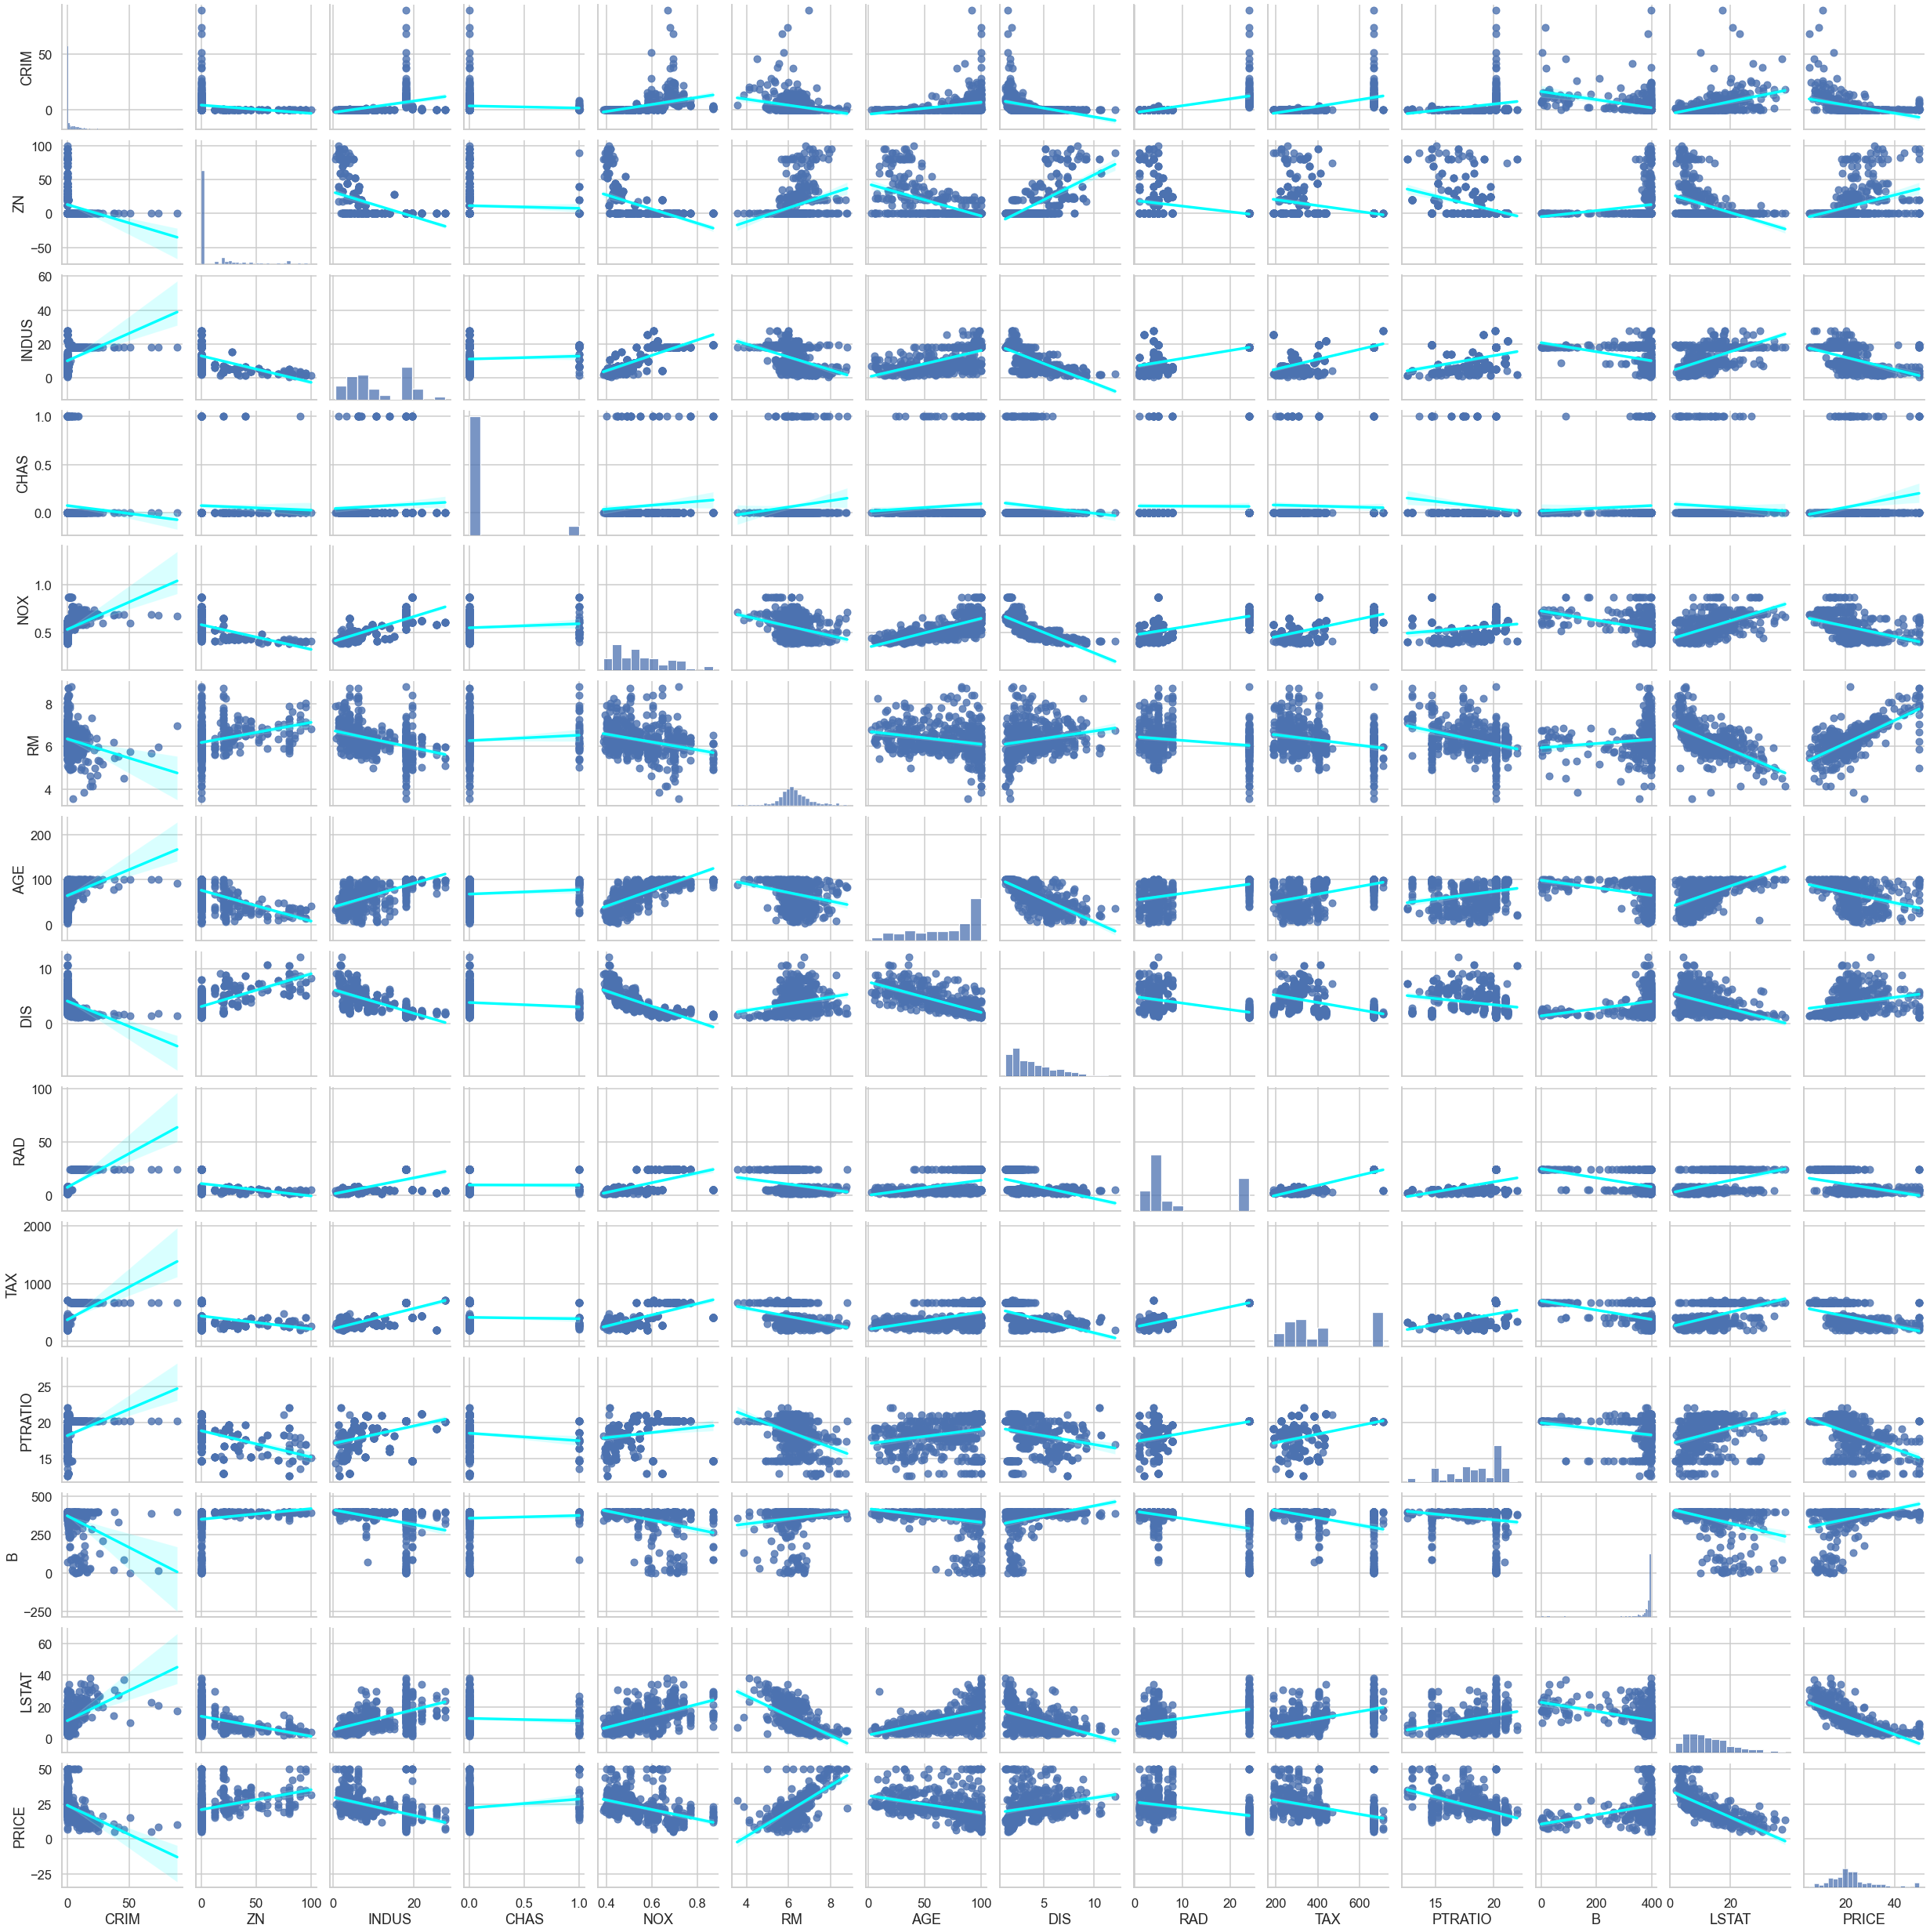

CPU times: total: 1min 53s
Wall time: 45.4 s


In [194]:
%%time

sns.pairplot(data, kind = 'reg', plot_kws = {'line_kws': {'color': 'cyan'}})
plt.show()

## Training and Test Dataset Split

In [195]:
prices = data['PRICE']
features = data.drop('PRICE', axis = 1)

# tuple unpacking
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10)

# % of the training dataset
print(len(X_train)/len(features))

# % of the test dataset
print(len(y_test)/ len(prices))

#other way
print(X_test.shape[0]/ features.shape[0])

0.7984189723320159
0.2015810276679842
0.2015810276679842


## Multivariable Regression

In [196]:
reg = LinearRegression()
reg.fit(X_train, y_train)

# R squared value of training and test data
print('Training Data R-Squared:', reg.score(X_train, y_train))
print('Test data R-Squared:', reg.score(X_test, y_test))

print('Intercept:', reg.intercept_)
pd.DataFrame(data = reg.coef_, index = X_train.columns, columns = ['coef'])

Training Data R-Squared: 0.750121534530608
Test data R-Squared: 0.6709339839115628
Intercept: 36.53305138282439


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

### Data Transformations

In [197]:
# finding the skew (Skewed data, that creates an asymmetrical, skewed curve on a graph)
# skewed data has a "tail" on either side of the graph.(see- data distribution)
data['PRICE'].skew()

1.1080984082549072

In [198]:
# log transformation
y_log = np.log(data['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [199]:
y_log.skew()

-0.33032129530987864

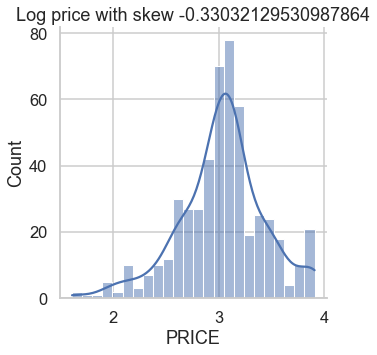

In [200]:
sns.displot(y_log, kde = True)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

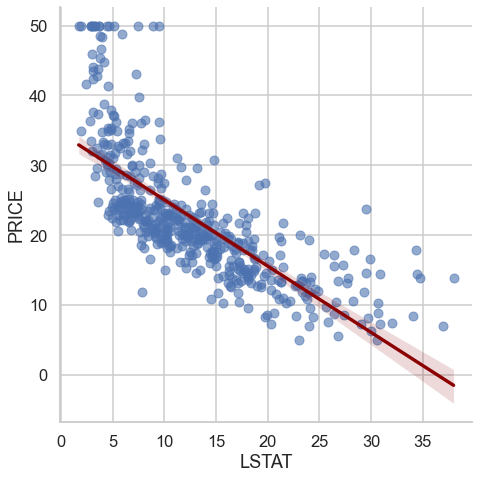

In [201]:
sns.lmplot(x = 'LSTAT', y = 'PRICE', data = data, height = 7, scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})

plt.show()

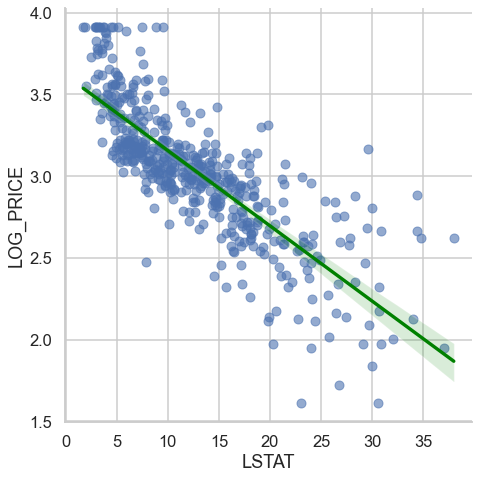

In [202]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x = 'LSTAT', y = 'LOG_PRICE', data = transformed_data, height = 7, scatter_kws={'alpha': 0.6}, line_kws={'color':'green'})

plt.show()

## Regression using log prices

In [203]:
prices = np.log(data['PRICE'])  # use log prices
features = data.drop('PRICE', axis = 1)

# tuple unpacking
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10)

reg = LinearRegression()
reg.fit(X_train, y_train)

# R squared value of training and test data
print('Training Data R-Squared:', reg.score(X_train, y_train))
print('Test data R-Squared:', reg.score(X_test, y_test))

print('Intercept:', reg.intercept_)
pd.DataFrame(data = reg.coef_, index = X_train.columns, columns = ['coef'])

Training Data R-Squared: 0.7930234826697583
Test data R-Squared: 0.7446922306260724
Intercept: 4.05994387177519


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [204]:
# charles river property premium
np.e**0.080331                    # changing back to normal from log

1.0836456950439142

## P-Values & Evaluting Regression

In [205]:
X_include_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_include_constant)      #OLS = ordinary least squared

results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef' : results.params, 'p-values': round(results.pvalues, 3)})

coef  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

## Testing for Multicollinearity
$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$
$$ VIF _{TAX} = \frac{1}{(1- R _{TAX} ^ 2)} $$

In [206]:
variance_inflation_factor(exog=X_include_constant, exog_idx=1)

1.7145250443932485

In [207]:
type(X_include_constant)

pandas.core.frame.DataFrame

In [208]:
X_include_constant.shape

(404, 14)

In [209]:
# print all VIFs for all features

for i in range(X_include_constant.shape[1]):
    print(variance_inflation_factor(exog=X_include_constant, exog_idx=i))
    

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [210]:
vif = []

for i in range(X_include_constant.shape[1]):
    vif.append(variance_inflation_factor(exog=X_include_constant, exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [211]:
vif = [(variance_inflation_factor(exog=X_include_constant, 
                                            exog_idx=i)) for i in range(X_include_constant.shape[1])]

pd.DataFrame({'coef_name': X_include_constant.columns, 'vif': np.around(vif, 2)})

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

## Model Simplification & the BIC

In [212]:
# BIC - Baysian Information Criterion
# original model with log prices and all features
X_include_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_include_constant)      #OLS = ordinary least squared
results = model.fit()

org_coef = pd.DataFrame({'coef' : results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is:', results.bic)
print('r-squared is:',results.rsquared)

BIC is: -139.74997769478875
r-squared is: 0.7930234826697582


In [213]:
# Reduced model #1 excuding INDUS
X_include_constant = sm.add_constant(X_train)
X_include_constant = X_include_constant.drop(['INDUS'], axis = 1)

model = sm.OLS(y_train, X_include_constant)      #OLS = ordinary least squared
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef' : results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is:', results.bic)
print('r-squared is:',results.rsquared)

BIC is: -145.14508855591163
r-squared is: 0.7927126289415163


In [214]:
# Reduced model #2 excuding INDUS, age
X_include_constant = sm.add_constant(X_train)
X_include_constant = X_include_constant.drop(['INDUS', 'AGE'], axis = 1)

model = sm.OLS(y_train, X_include_constant)      #OLS = ordinary least squared
results = model.fit()

reduced_coef = pd.DataFrame({'coef' : results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is:', results.bic)
print('r-squared is:',results.rsquared)

BIC is: -149.49934294224656
r-squared is: 0.7918657661852815


Lower the BIC number is better

In [215]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis = 1)

coef  p-values      coef  p-values      coef  p-values
const    4.059944     0.000  4.056231     0.000  4.035922     0.000
CRIM    -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
ZN       0.001579     0.009  0.001551     0.010  0.001461     0.014
INDUS    0.002030     0.445       NaN       NaN       NaN       NaN
CHAS     0.080331     0.038  0.082795     0.032  0.086449     0.025
NOX     -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
RM       0.073404     0.000  0.071739     0.000  0.076133     0.000
AGE      0.000763     0.209  0.000766     0.207       NaN       NaN
DIS     -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
RAD      0.014565     0.000  0.014014     0.000  0.013743     0.000
TAX     -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
PTRATIO -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
B        0.000516     0.000  0.000511     0.000  0.000518     0.000
LSTAT   -0.031390     0.000 -0.031262     0.000 -0.030271     0.000

## Residuals & Residuals Plots

0.89


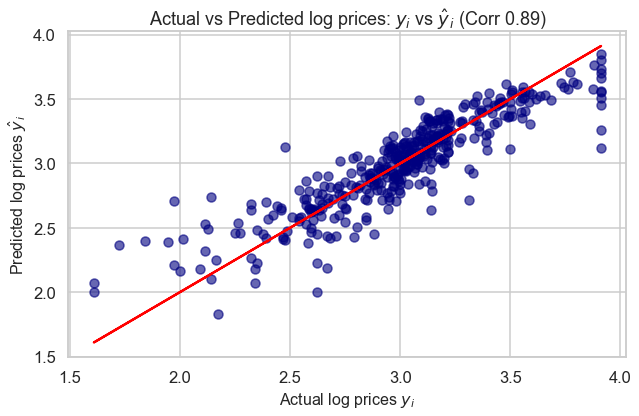

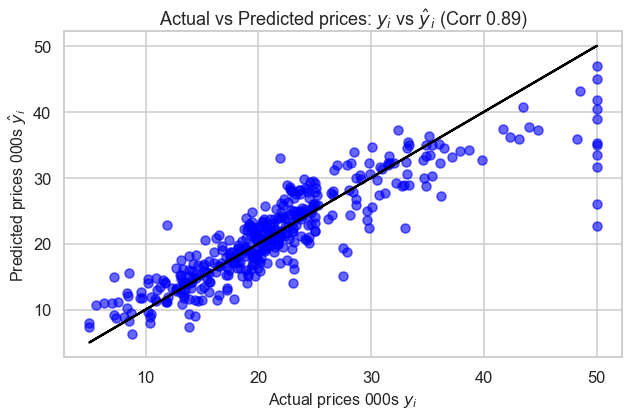

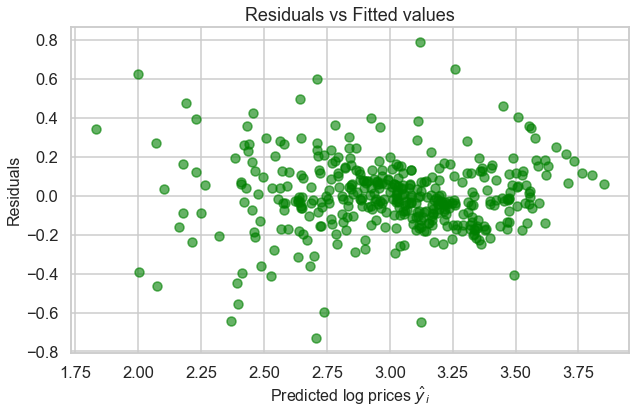

In [221]:
# Modified model: transformed (using log prices) and simplified (dropping two features)
prices = np.log(data['PRICE'])  # use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis = 1)

# tuple unpacking
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10)

# using statsmodel

X_include_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_constant)  
results = model.fit()

# residuals
#residuals = y_train - results.fittedvalues
#residuals.head()
#results.resid

# Graph of Actual vs Predicted Prices

corr = round(y_train.corr(results.fittedvalues), 2)
print(corr)

# log prices graph
plt.figure(figsize=(10,6))
plt.scatter(x = y_train, y = results.fittedvalues, c = 'Navy', alpha=0.6)
plt.plot(y_train, y_train, color = 'red')

plt.xlabel('Actual log prices $y _i$', fontsize = 16)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize = 16)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize = 18)

plt.show()

# actual prices graph

plt.figure(figsize=(10,6))
plt.scatter(x = np.e**y_train, y = np.e**results.fittedvalues, c = 'blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color = 'black')

plt.xlabel('Actual prices 000s $y _i$', fontsize = 16)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize = 16)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize = 18)

plt.show()

# residuals vs predicted values

plt.figure(figsize=(10,6))
plt.scatter(x = results.fittedvalues, y = results.resid, c = 'green', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.title('Residuals vs Fitted values', fontsize = 18)

plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)


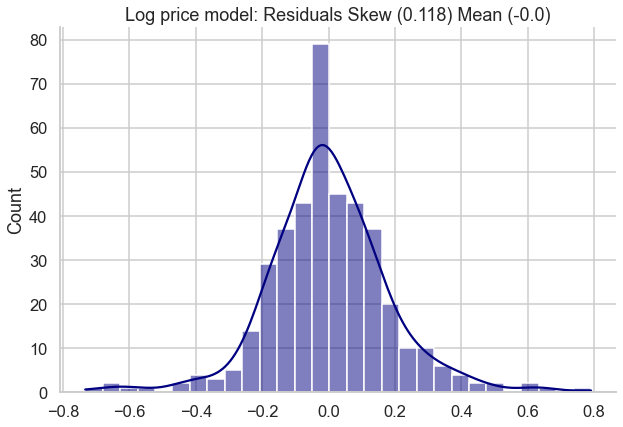

In [217]:
# Distribution of Residuals (log prices) - checking for normality

resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)


sns.displot(results.resid, kde = True, height=6, aspect=1.5, color = 'Navy')
plt.title(f'Log price model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')

plt.show()

0.87


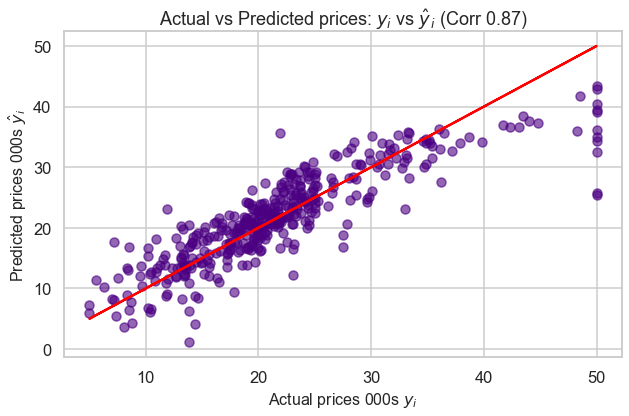

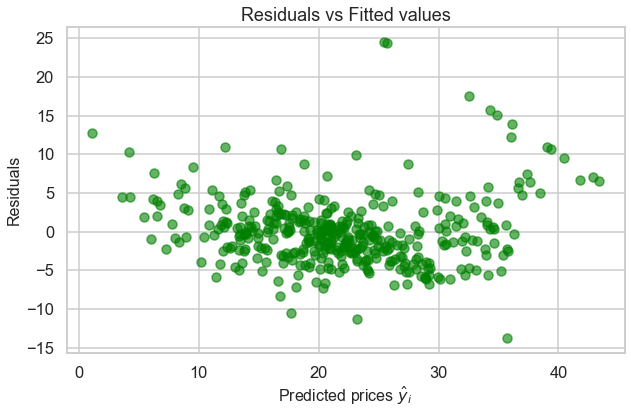

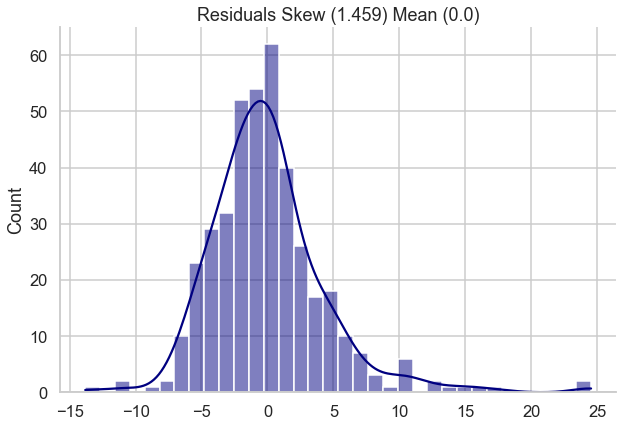

In [222]:
# Original model: Using normal prices & all features
prices = data['PRICE']  # use normal prices
features = data.drop(['PRICE'], axis = 1)

# tuple unpacking
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10)


X_include_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_constant)  
results = model.fit()


# Graph of Actual vs Predicted Prices

corr = round(y_train.corr(results.fittedvalues), 2)
print(corr)

# log prices graph

plt.figure(figsize=(10,6))
plt.scatter(x = y_train, y = results.fittedvalues, c = 'indigo', alpha=0.6)
plt.plot(y_train, y_train, color = 'red')

plt.xlabel('Actual prices 000s $y _i$', fontsize = 16)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize = 16)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize = 18)

plt.show()

# Residuals vs Predicted values

plt.figure(figsize=(10,6))
plt.scatter(x = results.fittedvalues, y = results.resid, c = 'green', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.title('Residuals vs Fitted values', fontsize = 18)

plt.show()

# Residuals distribution chart

resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)


sns.displot(results.resid, height = 6, aspect=1.5, kde = True, color = 'Navy')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')

plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

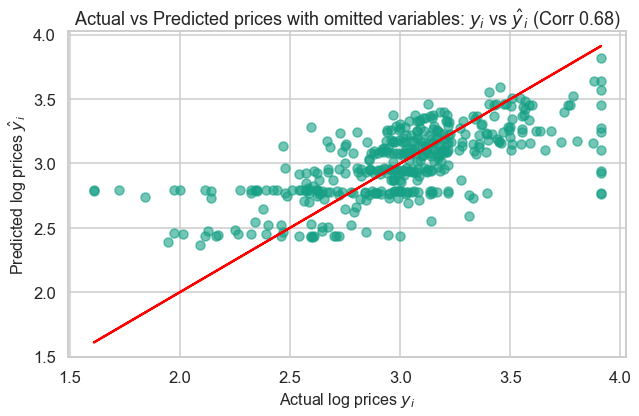

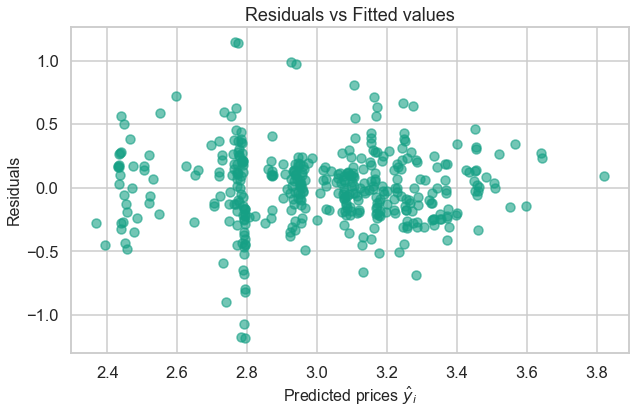

In [224]:
# Model omitting key features: using log prices 
prices = np.log(data['PRICE'])  # use normal prices
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis = 1)

# tuple unpacking
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10)


X_include_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_constant)  
results = model.fit()


# Graph of Actual vs Predicted Prices

corr = round(y_train.corr(results.fittedvalues), 2)
#print(corr)

# log prices graph

plt.figure(figsize=(10,6))
plt.scatter(x = y_train, y = results.fittedvalues, c = '#16a085', alpha=0.6)
plt.plot(y_train, y_train, color = 'red')

plt.xlabel('Actual log prices $y _i$', fontsize = 16)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize = 16)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize = 18)

plt.show()

# Residuals vs Predicted values

plt.figure(figsize=(10,6))
plt.scatter(x = results.fittedvalues, y = results.resid, c = '#16a085', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.title('Residuals vs Fitted values', fontsize = 18)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)


In [229]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse],
             'RMSE':np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])},
            index = ['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

R-Squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full Normal Price Model      0.750  19.921  4.463295
Omitted Var Model            0.460   0.090  0.300000

In [237]:
# Calculate the upper and lower bound for 95% prediction interval using the reduced log model
# If the house price estimate is $30,000

print('1 S.D in lig prices is:', np.sqrt(reduced_log_mse))         #1 S.D = 1 standard deviation 
print('2 S.D in lig prices is:', 2 * np.sqrt(reduced_log_mse))

# Upper bound
upper_bound = np.log(30) + 2 * np.sqrt(reduced_log_mse)
print('Upper bound in log prices for 95% prediction interval is:', upper_bound)
print('Upper bound in original prices for a 95% prediction interval is: $',np.e**upper_bound * 1000)

# Lower bound
lower_bound = np.log(30) - 2 * np.sqrt(reduced_log_mse)
print('Lower bound in log prices for 95% prediction interval is:', lower_bound)
print('Lower bound in original prices for a 95% prediction interval is: $',np.e**lower_bound * 1000)

1 S.D in lig prices is: 0.18708286933869708
2 S.D in lig prices is: 0.37416573867739417
Upper bound in log prices for 95% prediction interval is: 3.7753631203395495
Upper bound in original prices for a 95% prediction interval is: $ 43613.34233239937
Lower bound in log prices for 95% prediction interval is: 3.0270316429847615
Lower bound in original prices for a 95% prediction interval is: $ 20635.886906824155
